In [1]:
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy
import pandas
import torch
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

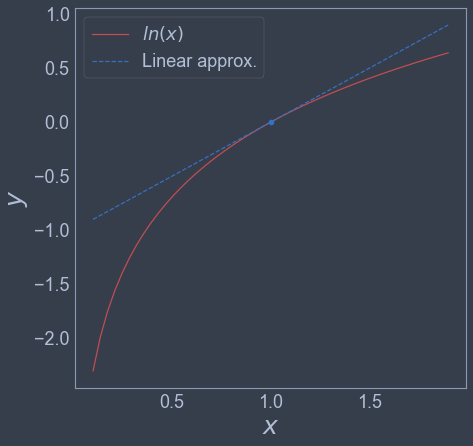

In [8]:
# 선형 근사 예제
# Taylor Series 이해 과정.

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

f = lambda x: np.log(x)
df = lambda x:1/x

x = np.linspace(0.1,1.9)

x0 = 1
L = lambda x: f(x0)+df(x0)*(x-x0)

ax.plot(x, f(x), c='r', label=r"$ln(x)$")
ax.plot(x, L(x), '--', c='b', label="Linear approx.")
ax.plot(1,0, 'o', c='b')

ax.legend(fontsize=18)

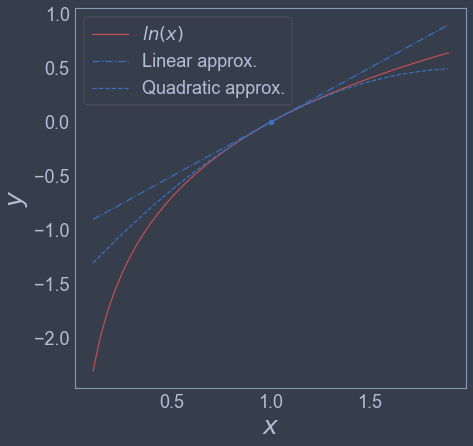

In [10]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

f = lambda x: np.log(x)
df = lambda x:1/x
df2 = lambda x:-1/x**2

x = np.linspace(0.1,1.9)

x0 = 1
Q = lambda x: f(x0)+df(x0)*(x-x0)+(1/2)*df2(x0)*(x-x0)**2

ax.plot(x, f(x), c='r', label=r"$ln(x)$")
ax.plot(x, L(x), '-.', c='b', label="Linear approx.")
ax.plot(x, Q(x), '--', c='b', label="Quadratic approx.")
ax.plot(1,0, 'o', c='b')

ax.legend(fontsize=18)

(-5.0, 5.0)

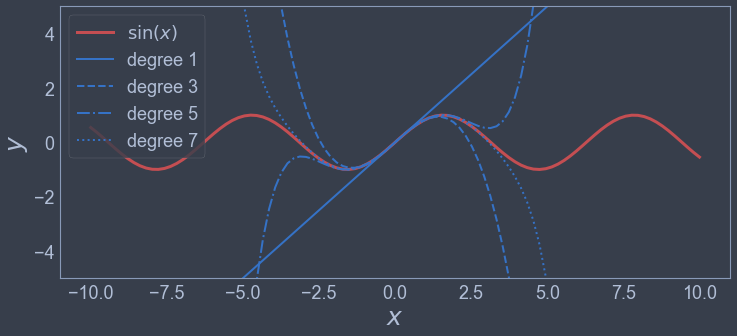

In [14]:
import math

degrees = (1,3,5,7)
ls = ('-','--','-.',':')

def taylor_e(x, a, n):
    """
    x* = a 에서 전개
    """
    signs = (1, -1, -1, 1)
    derivs = (np.cos, np.sin, np.cos, np.sin)
    
    fx = np.sin(a)
    
    for i in range(1, n+1):
        fx += (signs[(i%4)-1]*derivs[(i%4)-1](a)) / math.factorial(i)*(x-a)**i
    return fx

x = np.linspace(-10, 10, 100)
y = np.sin(x)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

taylors = (taylor_e(x, 0, i) for i in degrees)
ax.plot(x, y , lw=3, color='r', 
        label="$\sin(x)$")

for i, taylor in enumerate(taylors) :
    ax.plot(x, taylor, lw=2, ls=ls[i], color='b', 
            label="degree {}".format(degrees[i]))


ax.legend(fontsize=18);
ax.set_ylim([-5, 5])